# Setup 

## Libraries 

In [1]:
import matplotlib.pyplot as plt 
from matplotlib import image 

## Sizing 

In [2]:
width_pixels = 1920 
height_pixels = int(width_pixels * (120 / 53.3)) 
dpi = 120 

# Draw Field 

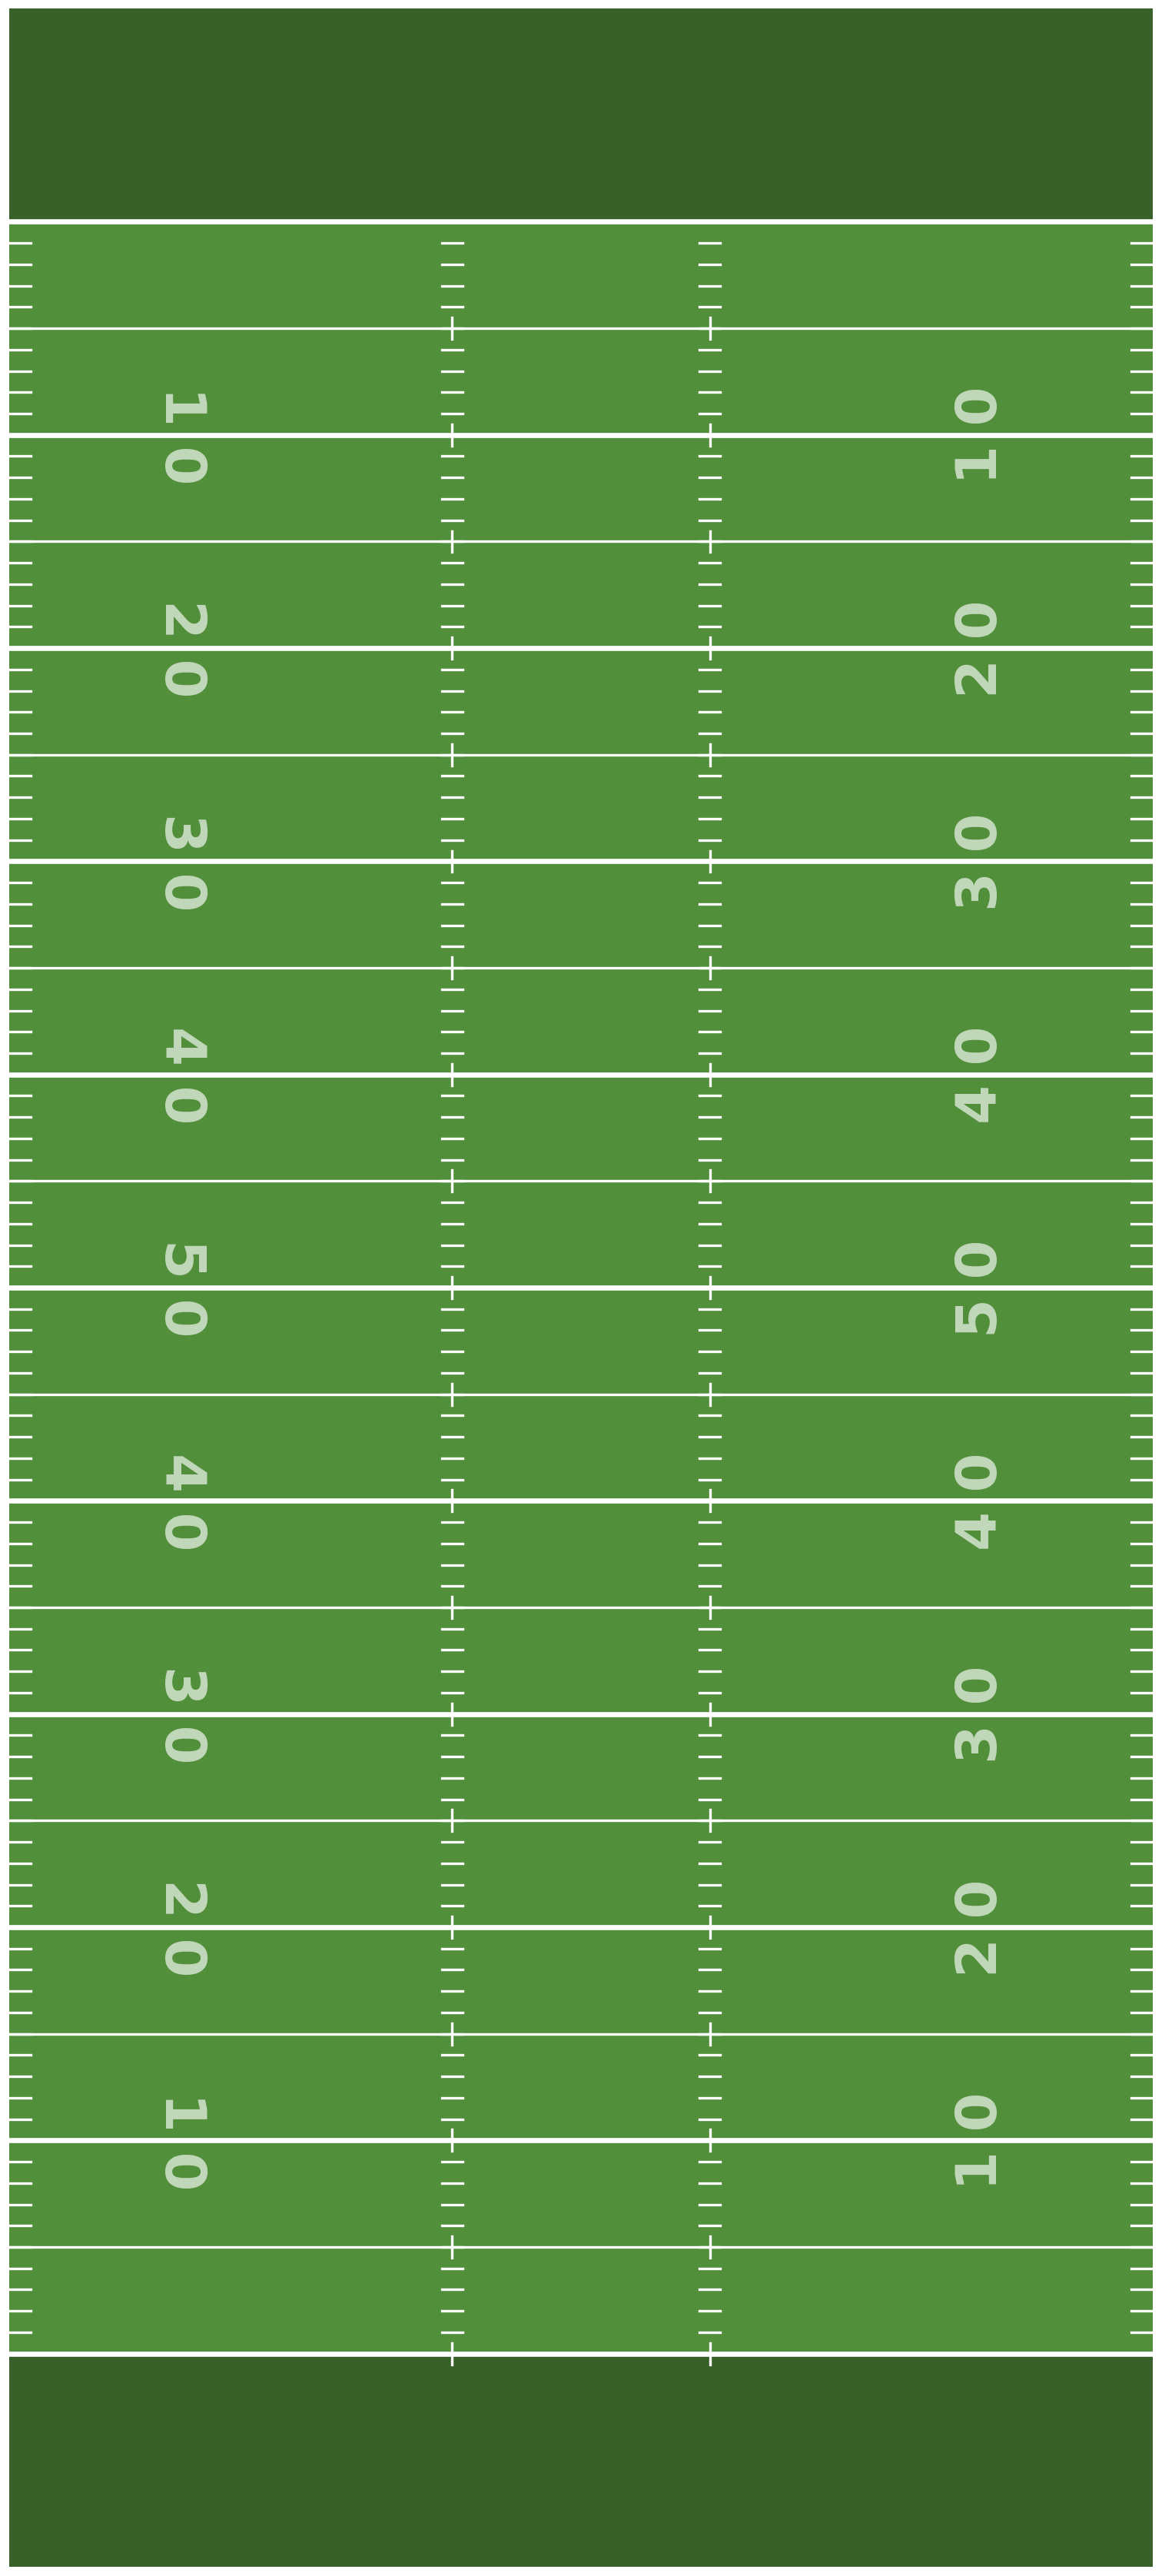

In [3]:
# create the figure and axis 
fig, ax = plt.subplots(
    figsize = (width_pixels / dpi, height_pixels / dpi), 
    dpi = dpi
) 

# Set the background color to green
ax.add_patch(plt.Rectangle(
    xy = (0, 0), 
    height = 120, 
    width = 53.3, 
    color = [0.32, 0.56, 0.23]
)) 

# draw a line for every 5 yards 
for i in range(0, 21):
    ax.plot(
        [0, 53.3], 
        [10 + (i * 5)] * 2, 
        color = 'white', 
        linewidth = [4, 2][i % 2] 
    ) 

# add the hash marks 
for x in [20.65, 32.65]: # left and right hash marks 
    for y in range(0, 20):
        yc = (y * 5) + 10 
        ax.plot(
            [x] * 2, 
            [yc - 0.5, yc + 0.5], 
            color = 'white', 
            linewidth = 2 
        ) 

# add markers for each yard line 
for x in [0.5, 20.65, 32.65, 52.8]:
    for yl in range(0, 100):
        ax.plot(
            [x - 0.5, x + 0.5], 
            [yl + 10] * 2, 
            color = 'white', 
            linewidth = 2 
        ) 

# add the numbers 
for i, txt in enumerate(["1 0", "2 0", "3 0", "4 0", "5 0", "4 0", "3 0", "2 0", "1 0"]):
    for x in [8, 53.3 - 8]:
        ax.text(
            x = x, 
            y = (i * 10) + 20, 
            s = txt, 
            color = 'white', 
            fontsize = 44, 
            fontweight = 'bold', 
            horizontalalignment = 'center', 
            verticalalignment = 'center', 
            rotation = -90 if x < 26.65 else 90, 
            alpha = 0.65
        ) 

# add rectangles for the endzones 
for i in [0, 110]:
    ax.add_patch(plt.Rectangle(
        xy = (0, i), 
        height = 10, 
        width = 53.3, 
        color = [0.22, 0.38, 0.16]
    )) 

# Set limits and hide axes 
ax.set_xlim(0, 53.3)
ax.set_ylim(0, 120) 
ax.axis('off') 

# save to an image 
plt.savefig('field_background.png', dpi = dpi, bbox_inches='tight', pad_inches=0) 

# Add Objects 

In [4]:
help(plt.imshow )

Help on function imshow in module matplotlib.pyplot:

imshow(
    X: 'ArrayLike | PIL.Image.Image',
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    *,
    aspect: "Literal['equal', 'auto'] | float | None" = None,
    interpolation: 'str | None' = None,
    alpha: 'float | ArrayLike | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    colorizer: 'Colorizer | None' = None,
    origin: "Literal['upper', 'lower'] | None" = None,
    extent: 'tuple[float, float, float, float] | None' = None,
    interpolation_stage: "Literal['data', 'rgba', 'auto'] | None" = None,
    filternorm: 'bool' = True,
    filterrad: 'float' = 4.0,
    resample: 'bool | None' = None,
    url: 'str | None' = None,
    data=None,
    **kwargs
) -> 'AxesImage'
    Display data as an image, i.e., on a 2D regular raster.

    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displ

In [5]:
help(fig.add_axes)

Help on method add_axes in module matplotlib.figure:

add_axes(*args, **kwargs) method of matplotlib.figure.Figure instance
    Add an `~.axes.Axes` to the figure.

    Call signatures::

        add_axes(rect, projection=None, polar=False, **kwargs)
        add_axes(ax)

    Parameters
    ----------
    rect : tuple (left, bottom, width, height)
        The dimensions (left, bottom, width, height) of the new
        `~.axes.Axes`. All quantities are in fractions of figure width and
        height.

    projection : {None, 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear', str}, optional
        The projection type of the `~.axes.Axes`. *str* is the name of
        a custom projection, see `~matplotlib.projections`. The default
        None results in a 'rectilinear' projection.

    polar : bool, default: False
        If True, equivalent to projection='polar'.

    axes_class : subclass type of `~.axes.Axes`, optional
        The `.axes.Axes` subclass that is instan

In [ ]:
# class for each play animation 
class PlayAnimation:

    def __init__(self):
        
        # import the field background 
        self.field = image.imread("field_background.png") 

        # create the figure and axis 
        self.fig, self.ax = plt.subplots(
            figsize = (width_pixels / dpi, height_pixels / dpi), 
            dpi = dpi
        ) 

        # Set limits and hide axes 
        self.ax.set_xlim(0, 53.3)
        self.ax.set_ylim(0, 120) 
        # self.ax.axis('off') 

        ax_field = self.fig.add_axes([0, 0, 53.3 / 2, 120 / 2], zorder = 0)
        ax_field.imshow(self.field) 

pa = PlayAnimation() 